# Students' dropout and Academic Success

### Project developed by:
- Pedro Jesus (up201907523)
- Sofia Germer (up201907461)
- Sérgio Estêvão (up201905680)

## Table of Contents

1. [Introduction](#Introduction)
2. [Bibliography](#Bibliography)
3. [Approach](#Approach)
4. [Required Libraries](#Required-libraries)
5. [Data Analysis](#Data-analysis)
6. [Data Preprocessing](#Data-Processing)
7. [Classification](#Classification)
    - [Decision Tree Classifier](#Decision-Tree-Classifier)
    - [Neural Network](#Neural-Network)
    - [K-Nearest Neighbors](#K-Nearest-Neighbors)
    - [Support-vector machines](#Support-vector-machines)

8. [Result Analysis](#Result-Analysis)
9. [Conclusion](#Conclusion)

## Introduction

The academic success of a student can often be related to the personal background and upbringing of the student.

To help predict whether the student finish his degree and graduated, dropout or was neither (still enrolled), the data set used in this project was created.

The data set provided consists of information about the student's personal life, financial state (tuitions up to date), semester grades, and information about the economy at the time of data retrieval (unemployment rate, GDP, inflation rate).

The goal of this project is to classify examples in regard to the analysis of the dataset. Furthermore, in the context of this dataset, to obtain the most accurate prediction with a set of given academic accomplishments.

This notebook covers the approach to the problem, how it was elaborated and the analysis of the results obtained.




## Bibliography

RAM000574, Dataset "Students' dropout and academic success" used, URL: https://www.kaggle.com/datasets/tulasiram574/students-dropout-and-academic-success <br>
NumPy Developers, Numpy documentation, URL: https://numpy.org/doc/stable/user/index.html#user <br>
pandas development team, pandas documentation, URL: https://pandas.pydata.org/docs/user_guide/index.html#user-guide<br>
Matplotlib Development team, Matplotlib documentation, URL: https://matplotlib.org/stable/index.html <br>
scikit-learn developers, scikit-learn documentation, URL: https://scikit-learn.org/0.18/documentation.html<br>
Michael Waskom, seaborn tutorial, URL: https://seaborn.pydata.org/tutorial.html<br>
imbalanced-learn developers, imbalanced-learn documentation, URL: https://imbalanced-learn.org/stable/user_guide.html<br>
George Liu, Optimizing Neural Networks — Where to Start?, URL: https://towardsdatascience.com/optimizing-neural-networks-where-to-start-5a2ed38c8345<br>

## Approach


The approach to this project was done as follows:

1. **Data analysis**: First we analyzed the dataset to inspect for the need for data pre-processing: checked the corresponding histograms, class distribution, and the existence of missing or null values.
2. **Algorithm implementation**: Flowing that, we defined the training and test sets using train/test split, resampled the dataset, and applied the SciKit Learn's algorithms to obtain the first results.
3. **Evaluation and refinement**: After analyzing the first results, tunning of each algorithm was done utilizing the SciKit Learn GridSearchCV to find the parameters of each algorithm that yielded the best overall results, and evaluated the final results.

## Required Libraries


- **NumPy**: Provides a fast numerical array structure and helper functions.
- **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- **matplotlib**: The essential Machine Learning package in Python.
- **sklearn**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- **seaborn**: Advanced statistical plotting library.
- **imbalanced-learn**: Offers re-sampling techniques, useful in datasets with strong class imbalance.

These libraries can be installed by running the following command in the terminal:
> ``` pip install -r requirements.txt ```

## Data analysis

We start by importing the required libraries and plotting some graphs for initial analysis of the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import sklearn as sk
import seaborn as sb
import warnings
import json

warnings.filterwarnings("ignore")


dataset = pd.read_csv('data.csv', na_values=['NA'], delimiter=";")

dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


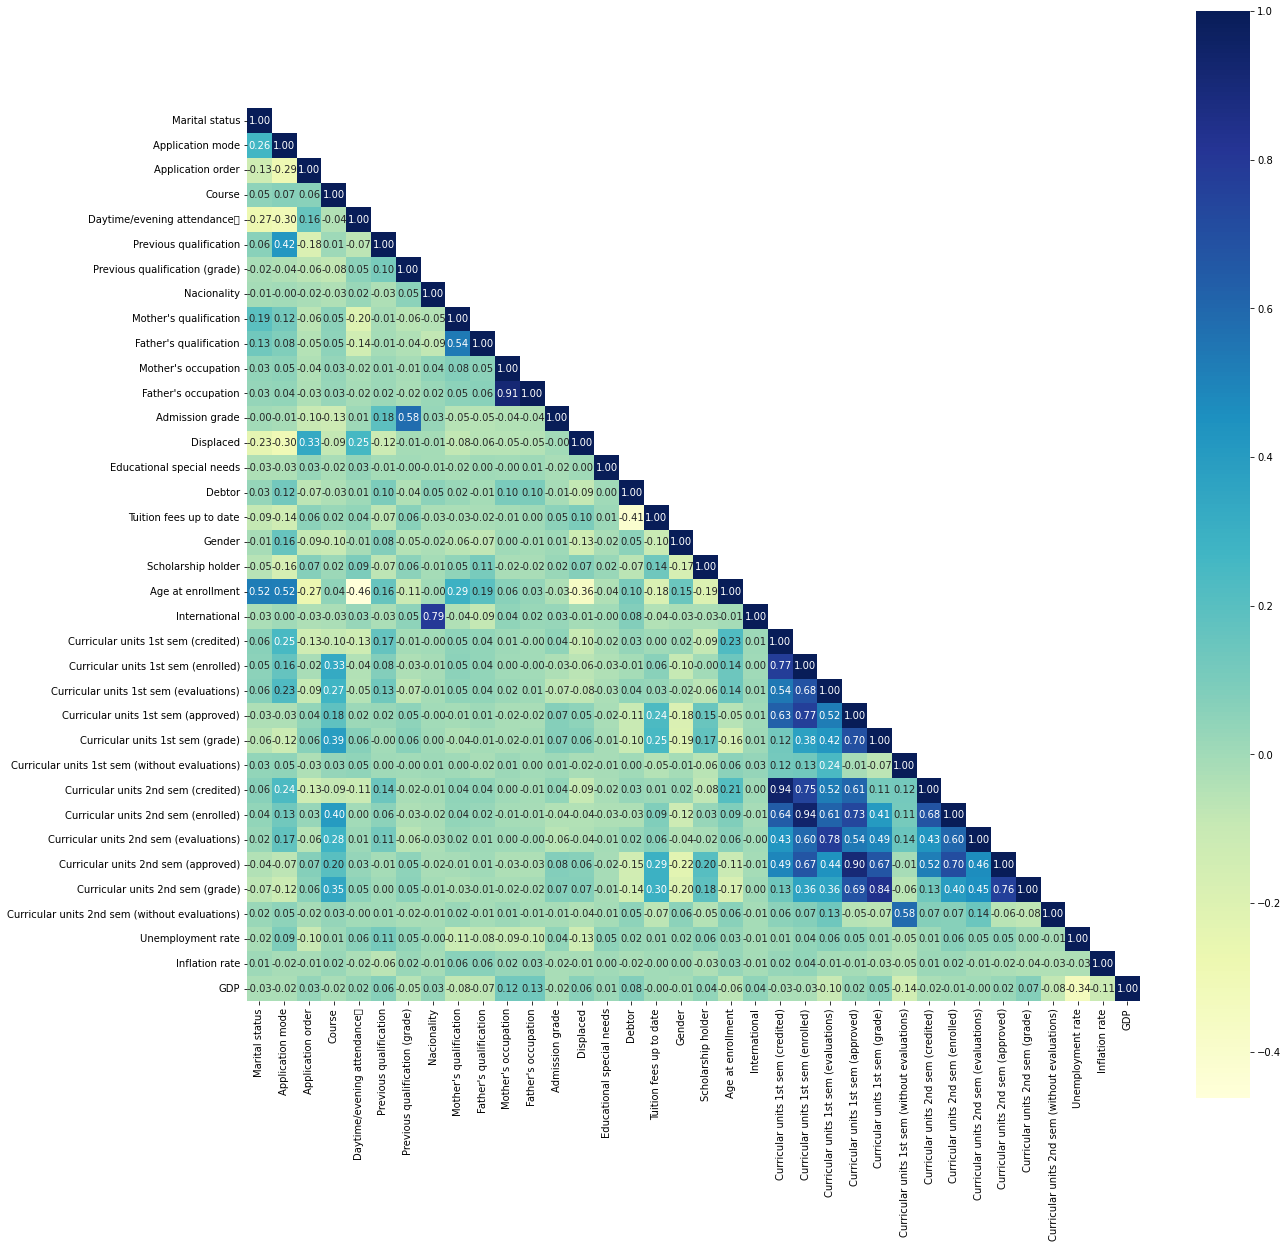

In [4]:
dataset_corr = dataset.corr()
plt.figure(figsize=(20,20))
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask, k=1)] = True
sb.heatmap(dataset_corr, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 10});
plt.show()

### All Data Histogram

array([[<AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Application mode'}>,
        <AxesSubplot:title={'center':'Application order'}>,
        <AxesSubplot:title={'center':'Course'}>,
        <AxesSubplot:title={'center':'Daytime/evening attendance\t'}>,
        <AxesSubplot:title={'center':'Previous qualification'}>],
       [<AxesSubplot:title={'center':'Previous qualification (grade)'}>,
        <AxesSubplot:title={'center':'Nacionality'}>,
        <AxesSubplot:title={'center':"Mother's qualification"}>,
        <AxesSubplot:title={'center':"Father's qualification"}>,
        <AxesSubplot:title={'center':"Mother's occupation"}>,
        <AxesSubplot:title={'center':"Father's occupation"}>],
       [<AxesSubplot:title={'center':'Admission grade'}>,
        <AxesSubplot:title={'center':'Displaced'}>,
        <AxesSubplot:title={'center':'Educational special needs'}>,
        <AxesSubplot:title={'center':'Debtor'}>,
        <AxesSubplot:title={'

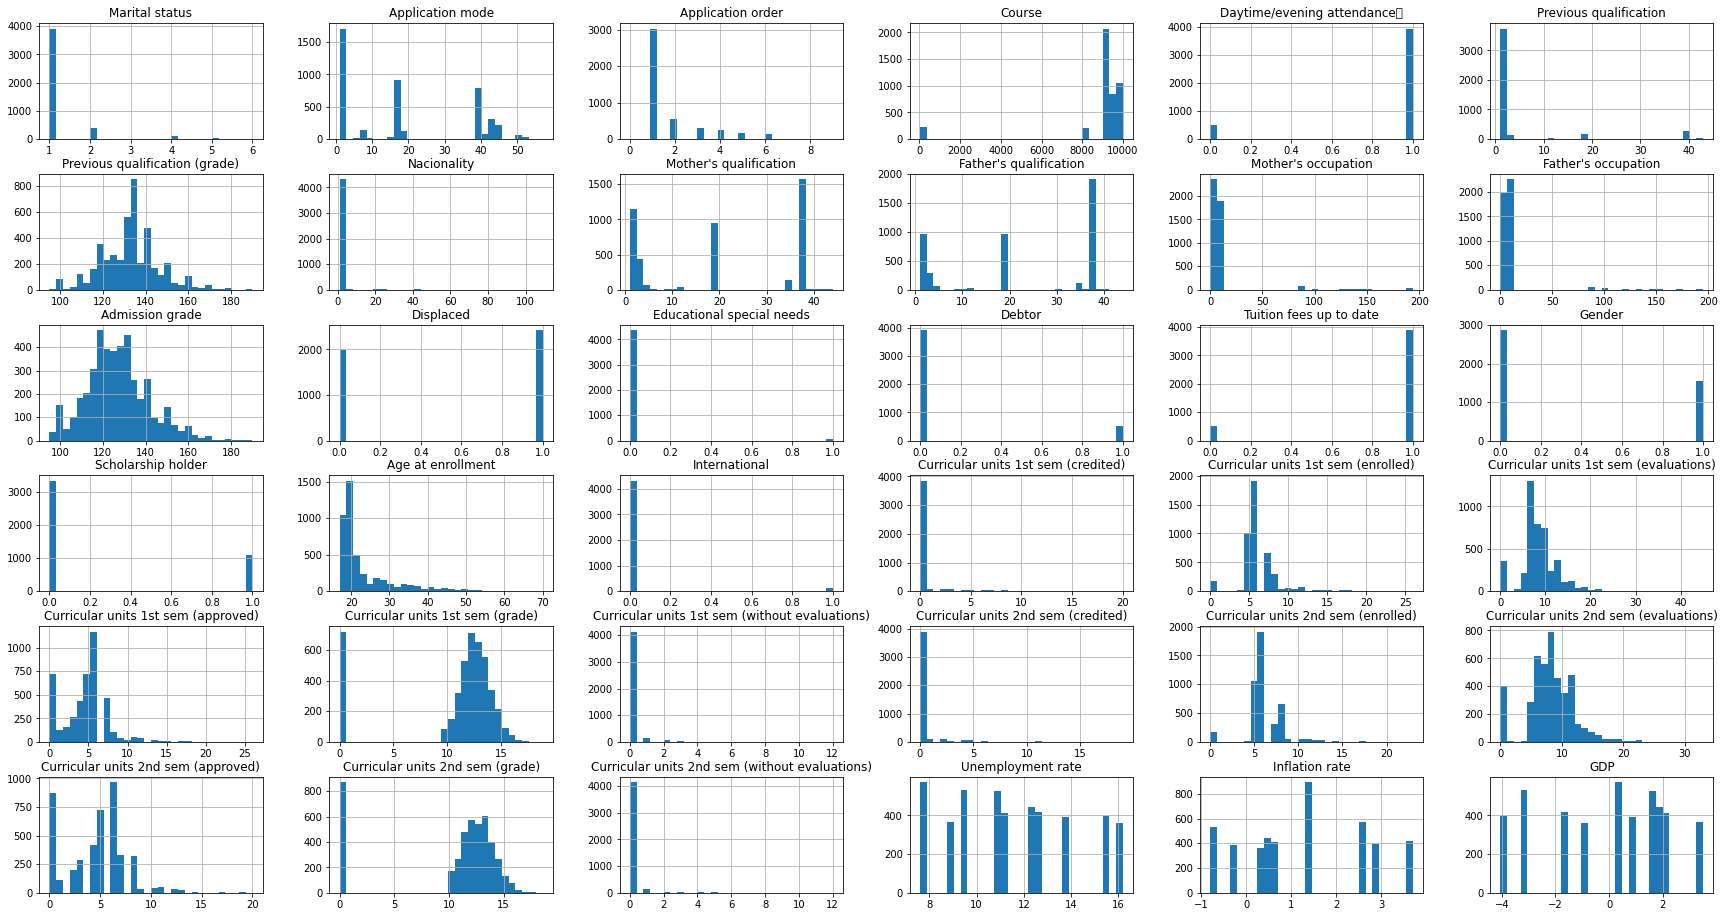

In [5]:
dataset.hist(bins=30, figsize=(30, 16), sharey=False)

### Dropout Data Histogram

array([[<AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Application mode'}>,
        <AxesSubplot:title={'center':'Application order'}>,
        <AxesSubplot:title={'center':'Course'}>,
        <AxesSubplot:title={'center':'Daytime/evening attendance\t'}>,
        <AxesSubplot:title={'center':'Previous qualification'}>],
       [<AxesSubplot:title={'center':'Previous qualification (grade)'}>,
        <AxesSubplot:title={'center':'Nacionality'}>,
        <AxesSubplot:title={'center':"Mother's qualification"}>,
        <AxesSubplot:title={'center':"Father's qualification"}>,
        <AxesSubplot:title={'center':"Mother's occupation"}>,
        <AxesSubplot:title={'center':"Father's occupation"}>],
       [<AxesSubplot:title={'center':'Admission grade'}>,
        <AxesSubplot:title={'center':'Displaced'}>,
        <AxesSubplot:title={'center':'Educational special needs'}>,
        <AxesSubplot:title={'center':'Debtor'}>,
        <AxesSubplot:title={'

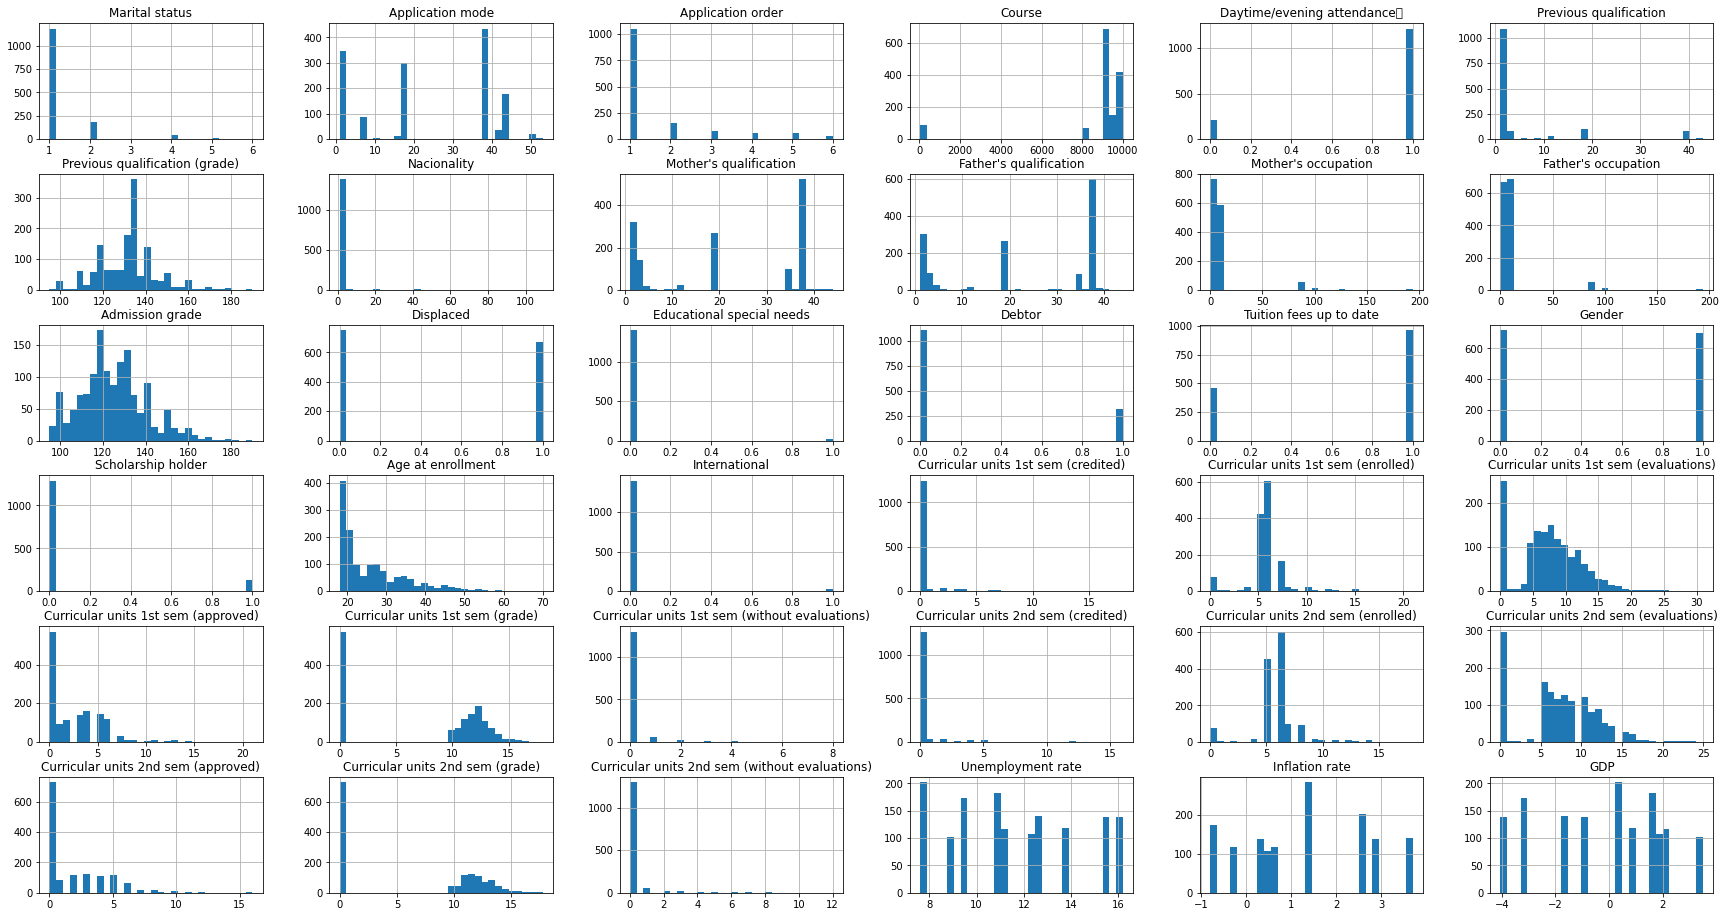

In [6]:
dropout_data = dataset.loc[dataset["Target"] == "Dropout"]
dropout_data.hist(bins=30, figsize=(30, 16), sharey=False)

### Graduate Data Histogram

array([[<AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Application mode'}>,
        <AxesSubplot:title={'center':'Application order'}>,
        <AxesSubplot:title={'center':'Course'}>,
        <AxesSubplot:title={'center':'Daytime/evening attendance\t'}>,
        <AxesSubplot:title={'center':'Previous qualification'}>],
       [<AxesSubplot:title={'center':'Previous qualification (grade)'}>,
        <AxesSubplot:title={'center':'Nacionality'}>,
        <AxesSubplot:title={'center':"Mother's qualification"}>,
        <AxesSubplot:title={'center':"Father's qualification"}>,
        <AxesSubplot:title={'center':"Mother's occupation"}>,
        <AxesSubplot:title={'center':"Father's occupation"}>],
       [<AxesSubplot:title={'center':'Admission grade'}>,
        <AxesSubplot:title={'center':'Displaced'}>,
        <AxesSubplot:title={'center':'Educational special needs'}>,
        <AxesSubplot:title={'center':'Debtor'}>,
        <AxesSubplot:title={'

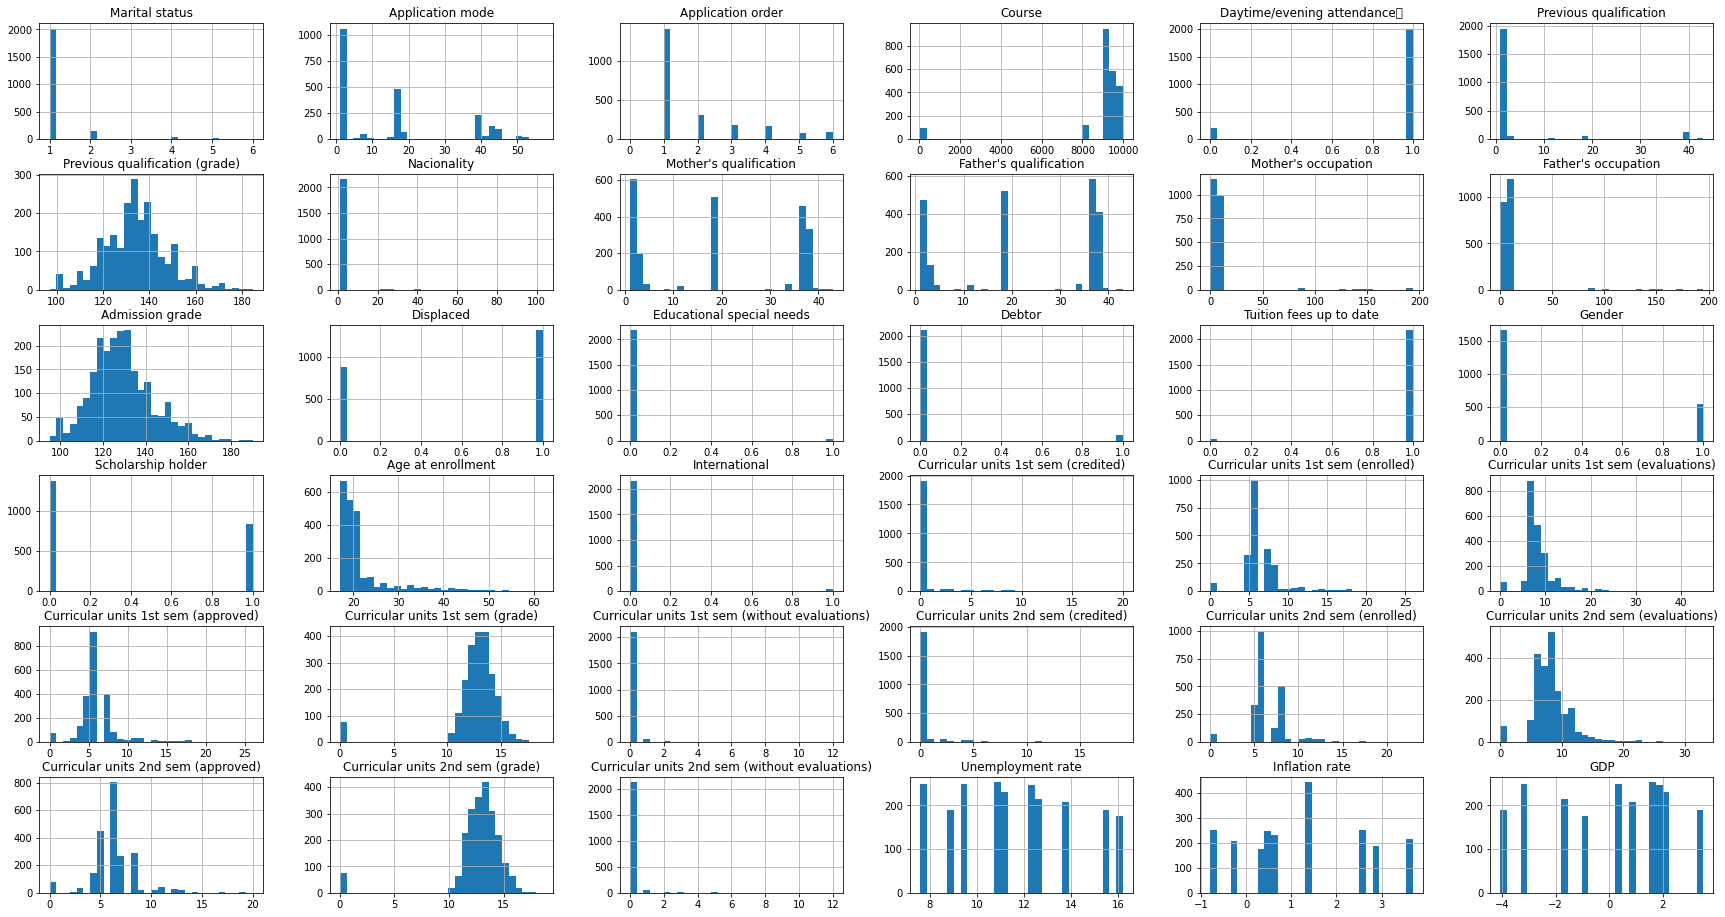

In [7]:
graduate_data = dataset.loc[dataset["Target"] == "Graduate"]
graduate_data.hist(bins=30, figsize=(30, 16), sharey=False)

### Enrolled Data Histogram

array([[<AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Application mode'}>,
        <AxesSubplot:title={'center':'Application order'}>,
        <AxesSubplot:title={'center':'Course'}>,
        <AxesSubplot:title={'center':'Daytime/evening attendance\t'}>,
        <AxesSubplot:title={'center':'Previous qualification'}>],
       [<AxesSubplot:title={'center':'Previous qualification (grade)'}>,
        <AxesSubplot:title={'center':'Nacionality'}>,
        <AxesSubplot:title={'center':"Mother's qualification"}>,
        <AxesSubplot:title={'center':"Father's qualification"}>,
        <AxesSubplot:title={'center':"Mother's occupation"}>,
        <AxesSubplot:title={'center':"Father's occupation"}>],
       [<AxesSubplot:title={'center':'Admission grade'}>,
        <AxesSubplot:title={'center':'Displaced'}>,
        <AxesSubplot:title={'center':'Educational special needs'}>,
        <AxesSubplot:title={'center':'Debtor'}>,
        <AxesSubplot:title={'

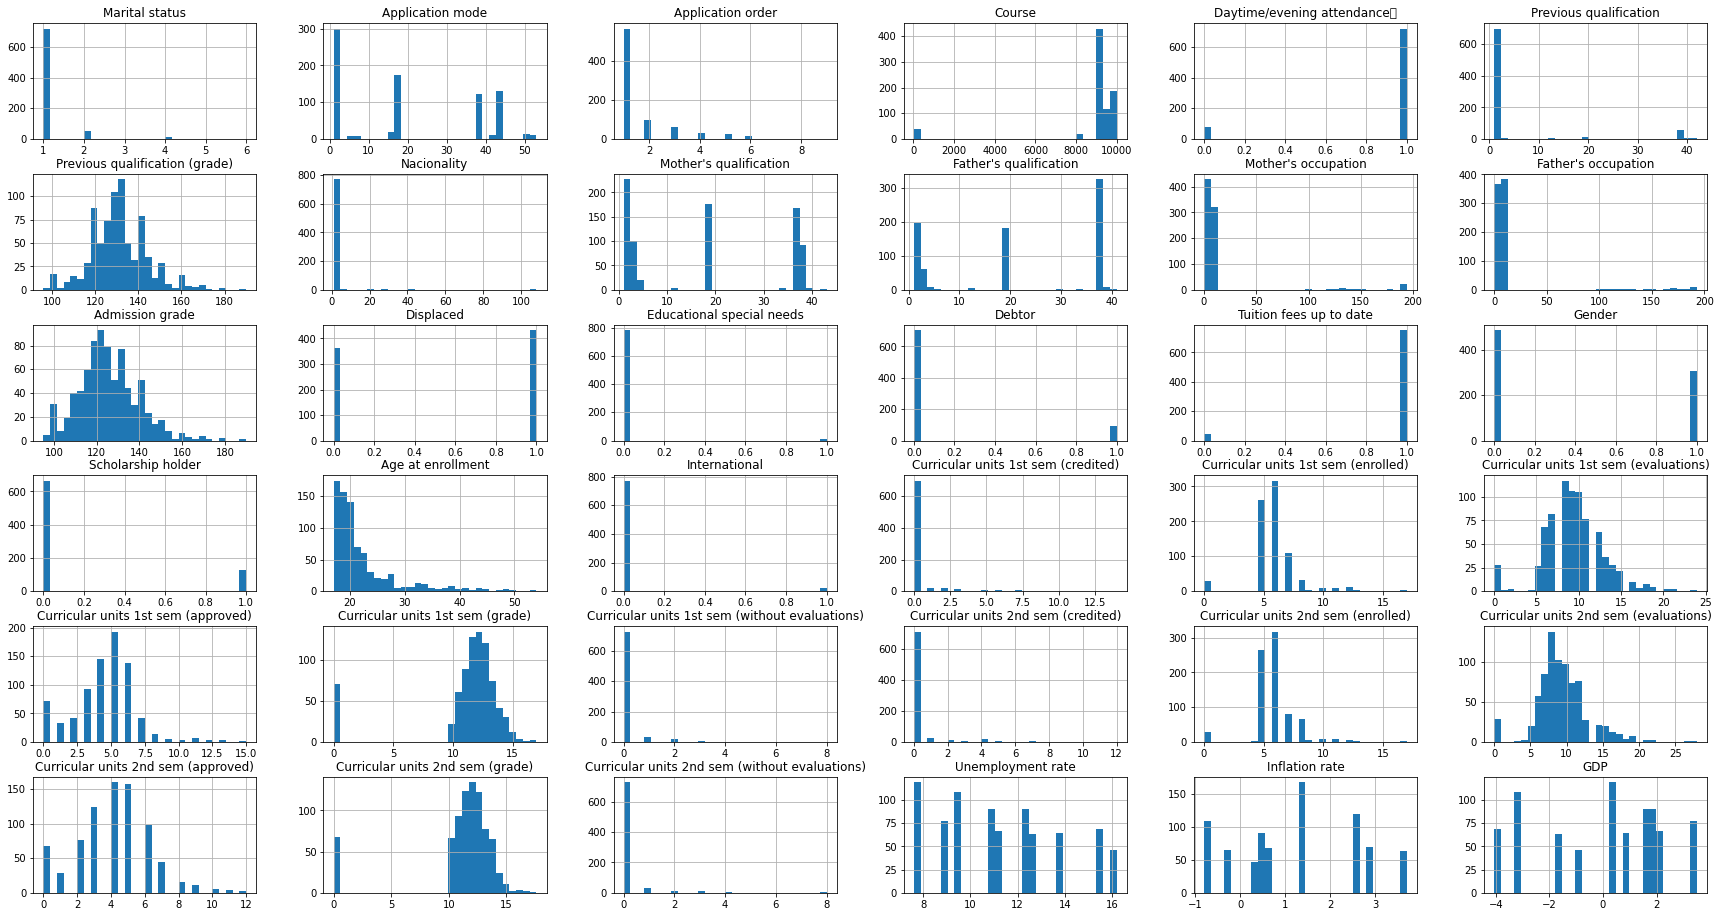

In [8]:
enrolled_data = dataset.loc[dataset["Target"] == "Enrolled"]
enrolled_data.hist(bins=30, figsize=(30, 16), sharey=False)

## Data Preprocessing

We checked the informations about the dataset and verified its consistency. After analysing the results we confirmed that there we no null values and no significant outliers, as seen in the results below, so a significant data preprocessing wasn't needed.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [11]:
dataset.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Here we split the data into input and label sets for the SciKit classifiers.

In [12]:
dataset['Target'] = dataset['Target'].astype('category')

col_names = list(dataset.columns)
col_names.remove('Target')

inputs = dataset[col_names].values
labels = dataset['Target'].values

We decided to analyse the destribution of results and verifies a resonable class destribution.

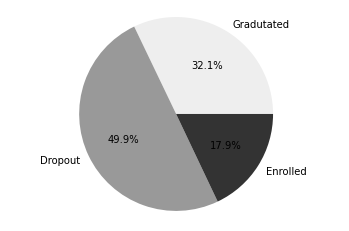

In [13]:
from collections import Counter

distribution_data = list(Counter(labels).values())

fig1, ax1 = plt.subplots()
colors = ( "#EEEEEE","#999999", "#333333") 
ax1.pie(distribution_data, colors = colors,labels=['Gradutated', 'Dropout', 'Enrolled'],autopct='%1.1f%%',)
ax1.axis('equal')  
plt.show()

### Train and Test split data

We used SciKit's built-in train_test_split function to generate train and test datasets. We define the training data using a 1/4 split of the entire dataset. . We use the stratify option in order to maintain the original dataset's class distribution.

In [14]:
from sklearn.model_selection import train_test_split

(train_in,
 test_in,
 train_classes,
 test_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1, stratify=labels)

## Resampling

Our data analysis stage showed that our working dataset was umbalanced. 

We implemented both undersampling and oversampling.These techniques differ in that undersampling removes samples from majority categories, while oversampling duplicates samples from minority categories. Oversampling is generally preffered, but undersampling generates smaller and therefore less complex datasets.

We used random undersampling that randomly chooses which samples to remove.

For oversampling we used the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. This generates new samples interpolated from the existing ones.

In [15]:
from collections import Counter

print("---Train Set---")
print(Counter(train_classes))
print("\n---Test Set---")
print(Counter(test_classes))

---Train Set---
Counter({'Graduate': 1657, 'Dropout': 1066, 'Enrolled': 595})

---Test Set---
Counter({'Graduate': 552, 'Dropout': 355, 'Enrolled': 199})


In [16]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

us_inputs, us_labels = rus.fit_resample(train_in, train_classes)

print(Counter(us_labels))

Counter({'Dropout': 595, 'Enrolled': 595, 'Graduate': 595})


In [17]:
from imblearn.over_sampling import SMOTE

ros = SMOTE()

os_inputs, os_labels = ros.fit_resample(train_in, train_classes)

print(Counter(os_labels))

Counter({'Graduate': 1657, 'Enrolled': 1657, 'Dropout': 1657})


Some of the algorithms we plan on using (KNN and SVM) require the data to be standardized. To do so, we used a StandardScaler from SciKit Learn's preprocessing library.

In [18]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(train_in)
train_in = scaler.fit_transform(train_in)
test_in = scaler.fit_transform(test_in)

scaler.fit(os_inputs)
os_inputs = scaler.fit_transform(os_inputs)

scaler.fit(us_inputs)
us_inputs = scaler.fit_transform(us_inputs)

# Classification

Next we used SciKit Learn's classification algorithm implementations to classify our data:

- Decision Tree Classifier
- Neural Networks
- K-Nearest Neighbors
- Support Vector Machines
- Multilayer Perceptron (NN)

## Decision Tree Classifier

### Normal Executions:

- #### Original Dataset

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(train_in, train_classes)
dtc_prediction = dtc.predict(test_in)

dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_og_report.json", "w") as outfile: 
    json.dump(dtc_classification_report, outfile)

- #### Undersampled Dataset

In [ ]:
dtc.fit(us_inputs, us_labels)
dtc_prediction = dtc.predict(test_in)

dtc_us_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_us_report.json", "w") as outfile: 
    json.dump(dtc_us_classification_report, outfile)

- #### Oversampled Dataset

In [ ]:
dtc.fit(os_inputs, os_labels)
dtc_prediction = dtc.predict(test_in)

dtc_os_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_os_report.json", "w") as outfile: 
    json.dump(dtc_os_classification_report, outfile)

### Parameter Tuning

#### GridSearchCV Setup

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
import numpy as np

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [2,4,6,8,10,12,14,16,18],
                   'max_features':[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 
                  31, 32, 33, 34, 35, 36, 37]}
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=parameter_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

- #### Original Dataset

In [ ]:
grid_search.fit(train_in, train_classes)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_og_tunning_report.json", "w") as outfile: 
    json.dump(best_dtc_classification_report, outfile)

- #### Undersampled Dataset

In [ ]:
grid_search.fit(us_inputs, us_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_us_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_us_tunning_report.json", "w") as outfile: 
    json.dump(best_us_dtc_classification_report, outfile)

- #### Oversampled Dateset

In [ ]:
grid_search.fit(os_inputs, os_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")


dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_os_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_os_tunning_report.json", "w") as outfile: 
    json.dump(best_os_dtc_classification_report, outfile)

## Neural Networks

### Normal Executions:

- #### Original Dataset

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import json


mlp = MLPClassifier()

mlp.fit(train_in, train_classes)
mlp_prediction = mlp.predict(test_in)

mlp_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/mlp_og_report.json", "w") as outfile: 
    json.dump(mlp_classification_report, outfile)

- #### Undersampled Dataset

In [ ]:
mlp.fit(us_inputs, us_labels)
mlp_prediction = mlp.predict(test_in)

mlp_us_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/mlp_us_report.json", "w") as outfile: 
    json.dump(mlp_us_classification_report, outfile)

- #### Oversampled Dataset

In [ ]:
mlp.fit(os_inputs, os_labels)
mlp_prediction = mlp.predict(test_in)

mlp_os_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/mlp_os_report.json", "w") as outfile: 
    json.dump(mlp_os_classification_report, outfile)

### Parameter Tuning

#### GridSearchCV Setup

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'hidden_layer_sizes': [50, 100, 150],
                  'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                  'alpha': [0.0001, 0.001, 0.01], 
                  'solver': [' sgd', 'lbfgs', 'adam'],
                  'max_iter' : [500]}

grid_search_cv = GridSearchCV(MLPClassifier(),
                           param_grid=parameter_grid,
                           cv=10,
                           verbose=1,
                           n_jobs=-1)

- #### Original DataSet

In [ ]:
grid_search_cv.fit(train_in, train_classes)
print(f"Best score: {grid_search_cv.best_score_}")
print(f"Best parameters: {grid_search_cv.best_params_}")
print(f"Best estimator: {grid_search_cv.best_estimator_}")

nn = grid_search_cv.best_estimator_
nn_prediction = nn.predict(train_in)
best_report = classification_report(train_classes, nn_prediction, output_dict=True)

print("Improved original dataset")
print(f"(Confusion matrix: \n{confusion_matrix(train_classes, nn_prediction)}\n\nClassification report:\n {classification_report(train_classes, nn_prediction)}\n")

with open("./reports/mlp_og_tunning_report.json", "w") as outfile:
    json.dump(best_report, outfile)

- #### Undersampled Dataset

In [ ]:
grid_search_cv.fit(us_inputs, us_labels)
print(f"Best score: {grid_search_cv.best_score_}")
print(f"Best parameters: {grid_search_cv.best_params_}")
print(f"Best estimator: {grid_search_cv.best_estimator_}")

nn = grid_search_cv.best_estimator_
nn_prediction = nn.predict(us_inputs)
best_report = classification_report(us_labels, nn_prediction, output_dict=True)

print("---  ---\n")
print(f"\n Confusion matrix: \n{confusion_matrix(us_labels, nn_prediction)}\n\nClassification report:\n {classification_report(us_labels, nn_prediction)}\n")

with open("./reports/mlp_us_tunning_report.json", "w") as outfile:
    json.dump(best_report, outfile)

- #### Oversampled Dataset

In [ ]:
grid_search_cv.fit(os_inputs, os_labels)
print(f"Best score: {grid_search_cv.best_score_}")
print(f"Best parameters: {grid_search_cv.best_params_}")
print(f"Best estimator: {grid_search_cv.best_estimator_}")

nn = grid_search_cv.best_estimator_
nn_prediction = nn.predict(os_inputs)
best_report = classification_report(os_labels, nn_prediction, output_dict=True)

print("---  ---\n")
print(f"Confusion matrix: \n{confusion_matrix(os_labels, nn_prediction)}\n\nClassification report:\n {classification_report(os_labels, nn_prediction)}\n")

with open("./reports/mlp_os_tunning_report.json", "w") as outfile:
    json.dump(best_report, outfile)

## K-Nearest Neighbors

### Original Dataset

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

classifier = KNeighborsClassifier()
classifier.fit(train_in, train_classes)
y_pred = classifier.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
knn_og_report = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (knn_og_report) 

with open("./reports/knn_og_report.json", "w") as outfile:
    json.dump(knn_og_report, outfile) 

Confusion Matrix:
[[238  45  72]
 [ 47  49 103]
 [ 33  39 480]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.75      0.67      0.71       355
    Enrolled       0.37      0.25      0.30       199
    Graduate       0.73      0.87      0.80       552

    accuracy                           0.69      1106
   macro avg       0.62      0.60      0.60      1106
weighted avg       0.67      0.69      0.68      1106



### Undersampled Dataset

In [29]:
classifier = KNeighborsClassifier()
classifier.fit(us_inputs, us_labels)
y_pred = classifier.predict(test_in)

knn_confusion_matrix = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(knn_confusion_matrix)
knn_us_report = classification_report(test_classes, y_pred)
print("Classification Report:",)
print(knn_us_report)

with open("./reports/knn_us_report.json", "w") as outfile:
    json.dump(knn_us_report, outfile) 

Confusion Matrix:
[[223  99  33]
 [ 34 122  43]
 [ 51 164 337]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.72      0.63      0.67       355
    Enrolled       0.32      0.61      0.42       199
    Graduate       0.82      0.61      0.70       552

    accuracy                           0.62      1106
   macro avg       0.62      0.62      0.60      1106
weighted avg       0.70      0.62      0.64      1106



### Oversampled Dataset

In [30]:
classifier = KNeighborsClassifier()
classifier.fit(os_inputs, os_labels)
y_pred = classifier.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
knn_os_report = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (knn_os_report)

with open("./reports/knn_os_report.json", "w") as outfile:
    json.dump(knn_os_report, outfile) 

Confusion Matrix:
[[222 101  32]
 [ 42 114  43]
 [ 48 161 343]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.71      0.63      0.67       355
    Enrolled       0.30      0.57      0.40       199
    Graduate       0.82      0.62      0.71       552

    accuracy                           0.61      1106
   macro avg       0.61      0.61      0.59      1106
weighted avg       0.69      0.61      0.64      1106



### Relationship between the values of K and the corresponding testing accuracy

In [ ]:
Range_k = range(1,30)
scores = {}
scores_list = []
for k in Range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(train_in, train_classes)
   y_pred = classifier.predict(test_in)
   scores[k] = accuracy_score(test_classes,y_pred)
   scores_list.append(accuracy_score(test_classes,y_pred))

import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy") 

## Support Vector Machines

### Original Dataset

In [31]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(train_in, train_classes)
y_pred = classifier.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
svc_og_report = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (svc_og_report) 

with open("./reports/svc_og_report.json", "w") as outfile:
    json.dump(svc_og_report, outfile)

Confusion Matrix:
[[222 101  32]
 [ 42 114  43]
 [ 48 161 343]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.71      0.63      0.67       355
    Enrolled       0.30      0.57      0.40       199
    Graduate       0.82      0.62      0.71       552

    accuracy                           0.61      1106
   macro avg       0.61      0.61      0.59      1106
weighted avg       0.69      0.61      0.64      1106



### Undersampled Dataset

In [35]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(us_inputs, us_labels)
y_pred = classifier.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
svc_us_report = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (svc_us_report) 

with open("./reports/svc_us_report.json", "w") as outfile:
    json.dump(svc_us_report, outfile)

Confusion Matrix:
[[222 101  32]
 [ 42 114  43]
 [ 48 161 343]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.71      0.63      0.67       355
    Enrolled       0.30      0.57      0.40       199
    Graduate       0.82      0.62      0.71       552

    accuracy                           0.61      1106
   macro avg       0.61      0.61      0.59      1106
weighted avg       0.69      0.61      0.64      1106



### Oversampled Dataset

In [37]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(os_inputs, os_labels)
y_pred = classifier.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
svc_os_report = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (svc_os_report) 

with open("./reports/svc_os_report.json", "w") as outfile:
    json.dump(svc_os_report, outfile)

Confusion Matrix:
[[222 101  32]
 [ 42 114  43]
 [ 48 161 343]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.71      0.63      0.67       355
    Enrolled       0.30      0.57      0.40       199
    Graduate       0.82      0.62      0.71       552

    accuracy                           0.61      1106
   macro avg       0.61      0.61      0.59      1106
weighted avg       0.69      0.61      0.64      1106



## Results Analysis

In [ ]:
#Dar load de todos os results.json


#DTC
with open("./reports/dtc_og_report.json") as json_file:
    dtc_classification_report = json.load(json_file)
with open("./reports/dtc_us_report.json") as json_file:
    dtc_us_classification_report = json.load(json_file)
with open("./reports/dtc_os_report.json") as json_file:
    dtc_os_classification_report = json.load(json_file)

with open("./reports/dtc_og_tunning_report.json") as json_file:
    dtc_tunning_classification_report = json.load(json_file)
with open("./reports/dtc_us_tunning_report.json") as json_file:
    dtc_us_tunning_classification_report = json.load(json_file)
with open("./reports/dtc_os_tunning_report.json") as json_file:
    dtc_os_tunning_classification_report = json.load(json_file)

#NeuralNetwork
with open("./reports/mlp_og_report.json") as json_file:
    mlp_classification_report = json.load(json_file)
with open("./reports/mlp_us_report.json") as json_file:
    mlp_us_classification_report = json.load(json_file)
with open("./reports/mlp_os_report.json") as json_file:
    mlp_os_classification_report = json.load(json_file)

with open("./reports/mlp_og_tunning_report.json") as json_file:
    mlp_tunning_classification_report = json.load(json_file)
with open("./reports/mlp_us_tunning_report.json") as json_file:
    mlp_us_tunning_classification_report = json.load(json_file)
with open("./reports/mlp_os_tunning_report.json") as json_file:
    mlp_os_tunning_classification_report = json.load(json_file)

#K-Nearest Neighbors

#Support Vector Machines

### Accuracy Comparison

In [ ]:
prediction_data = [
    [dtc_classification_report['accuracy'], mlp_classification_report['accuracy']],
    [dtc_tunning_classification_report['accuracy'], mlp_tunning_classification_report['accuracy']],
    [dtc_us_classification_report['accuracy'], dtc_us_classification_report['accuracy']],
    [dtc_us_tunning_classification_report['accuracy'], mlp_us_tunning_classification_report['accuracy']],
    [dtc_os_classification_report['accuracy'], mlp_os_classification_report['accuracy']],
    [dtc_os_tunning_classification_report['accuracy'], mlp_os_tunning_classification_report['accuracy']],
]

X = np.arange(0,4,2)
fig = plt.figure()
ax = fig.add_axes([0,0,])

ax.bar(X, prediction_data[0], color='#91232C', width=0.2)
for i in range(2):
    plt.text(X[i] - 0.1, prediction_data[0][i] + 0.005, f"{prediction_data[0][i]:.2f}")
ax.bar(X + 0.23, prediction_data[1], color='#3C1287', width=0.2)
for i in range(2):
    plt.text(X[i] + 0.13, prediction_data[1][i] + 0.005, f"{prediction_data[1][i]:.2f}")

ax.bar(X + 0.5, prediction_data[2], color='#C22F3A', width=0.2)
for i in range(2):
    plt.text(X[i] + 0.4, prediction_data[2][i] + 0.005, f"{prediction_data[2][i]:.2f}")
ax.bar(X + 0.73, prediction_data[3], color='#6D4DA5', width=0.2, tick_label=['DT', 'KNN', 'SVM', 'NN'])
for i in range(2):
    plt.text(X[i] + 0.63, prediction_data[3][i] + 0.005, f"{prediction_data[3][i]:.2f}")

ax.bar(X + 1, prediction_data[4], color='#D68C92', width=0.2)
for i in range(2):
    plt.text(X[i] + 0.9, prediction_data[4][i] + 0.005, f"{prediction_data[4][i]:.2f}")
ax.bar(X + 1.23, prediction_data[5], color='#CEC4E1', width=0.2)
for i in range(2):
    plt.text(X[i] + 1.13, prediction_data[5][i] + 0.005, f"{prediction_data[5][i]:.2f}")

ax.set_ylim(ymin=0)

original = mpatches.Patch(color='#91232C', label='Original')
best_og = mpatches.Patch(color='#3C1287', label='GS-Original')
undersampled = mpatches.Patch(color='#C22F3A', label='Undersampling')
best_us = mpatches.Patch(color='#6D4DA5', label='GS-Undersampling')
oversampled = mpatches.Patch(color='#D68C92', label='Oversampling')
best_os = mpatches.Patch(color='#CEC4E1', label='GS-Oversampling')
plt.legend(handles=[original, best_og, undersampled, best_us, oversampled, best_os], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy by algorithm")

plt.show()

## Conclusions
### The data
A first look into the data revealed that columns had low correlations in general. Only the columns related to grades had high correlations as it should be expected (good grades on the fist semester generally mean good grades on the second semester).

The data was also highly imbalanced as it had 36 columns (not counting the target column) but only around 4700 rows. Accompanying this were low cases of the "Enrolled" target which is also tough to deduce from the columns given: it's hard distinguish between an enrolled student from a graduate from only the average grades. The goal of the competetion should have been to predict if the student is a graduate or a dropout.

### The model
In general all classifiers predict if a student is enrolled with low precision and f1-score due to a poor dataset. Parameter tuning also improved the results for all classifiers.

#### Decision Tree
With the Decision Tree classifier the best results were yielded on the original dataset with a cross validation data tuning. Oversampling and undersampling with or without data tuning underperformed.

#### Multi layer perceptron